#Churn use case

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 133MB/s]


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
churn['Churn'].value_counts()

,count
Churn,
0,2850
1,2850


In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = churn[cols]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(4560, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.79136262, -0.35021324, -0.38110818, -0.53143727, -1.43597015],
       [-0.59942158,  0.53430602,  0.22301442, -1.15360774, -1.28344696],
       [ 0.82296141,  0.1638166 ,  0.51500701,  0.09073319, -0.24120517],
       ...,
       [ 0.53689556,  1.43822264,  0.61770785, -1.15360774, -0.11410251],
       [-0.90455848,  0.11532321, -0.19181643,  1.95724459,  0.95355982],
       [-0.38487219, -0.54030729,  0.9318516 ,  0.09073319,  0.39430812]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[0.72176541 0.2786646  0.10183591 0.7869764  0.03877948]]
intercept =  [0.01124919]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Evaluation Metrics


In [ ]:
model.predict(X_train)

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
def accuracy(y_true, y_pred):
  y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
accuracy(y_train, model.predict(X_train))

np.float64(0.712280701754386)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train , model.predict(X_train) )

0.712280701754386

#Spam Use Case

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 163MB/s]


In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5171 | 2 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **text** |email text|
|02| **label_num** |0 → Not Spam, 1 → Spam|

**Observe**

As the whole data is in textual format, we use:
- Some advance Natural Language technique (which you will learn in later modules)
- To convert the text into numerical features

In [ ]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 131MB/s]


In [ ]:
dt = pd.read_csv('Spam_finalData.csv')

In [ ]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


**observe**

The text feature is now converted to 15 features [```Feature0 - Feature14 ```] with numerical values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

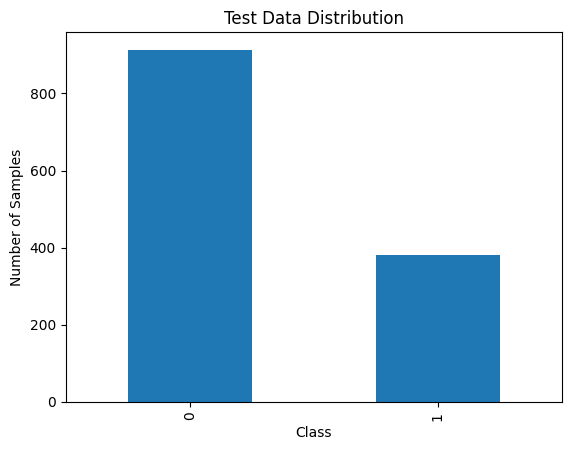

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

**Observe**

In the data, samples of **spam** (class 1 ) $\approx 850$ and samples of **not Spam** (class 0) $\approx 350$. This means:

- **Not spam** $\approx \frac{850}{1200} \times 100 = 70.83$ %
- **spam** $\approx \frac{350}{1200} \times 100 = 29.17$ %

<br>

**note:**  As the data distribution is irregular, meaning one class dominates the other, this is known as **imbalance Data**

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.925754060324826


##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[844,  69],
       [ 27, 353]])

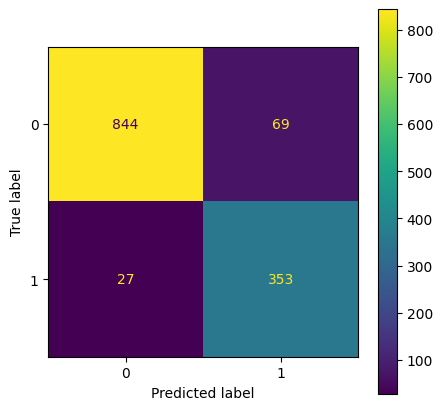

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8364928909952607
0.9289473684210526
0.8802992518703242


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       913
           1       0.84      0.93      0.88       380

    accuracy                           0.93      1293
   macro avg       0.90      0.93      0.91      1293
weighted avg       0.93      0.93      0.93      1293



##Handling Imbalance Data

###Class weight

In [ ]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(X_train , y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred =  model.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

0.8381374722838137

###OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()

In [ ]:
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()
model.fit(X_train_oversampled , y_train_oversampled)

y_pred_train = model.predict(X_train_oversampled)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train_oversampled , y_pred_train)
f1_test = f1_score(y_test , y_pred_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
label_num
0    2759
1    1119
Name: count, dtype: int64
After Oversampling
label_num
0    2759
1    2759
Name: count, dtype: int64
Training F1 score:0.9284503221430993, Testing F1 score:0.84375


###Oversamling with Smote

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print('Before Oversampling')
print(y_train.value_counts())
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_sm.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')
model.fit(X_sm , y_sm)

y_pred_train = model.predict(X_sm)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_sm , y_pred_train)
f1_test = f1_score(y_test , y_pred_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
label_num
0    2759
1    1119
Name: count, dtype: int64
After Oversampling
label_num
0    2759
1    2759
Name: count, dtype: int64
Training F1 score:0.9571504143889966, Testing F1 score:0.9068627450980392


##Validation

In [ ]:
# 70% train, 15% val, 15% test
x_train, x_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=64)
x_test, x_val, y_test, y_val = train_test_split(x_remaining, y_remaining, test_size=0.5, random_state=71)


###Base Model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_val_pred = model.predict(x_val)
print("F1 Score (unbalanced):", f1_score(y_val, y_val_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=5, penalty='l1', solver='liblinear')

###Class weight Model

In [ ]:
model_bal = LogisticRegression(class_weight='balanced')
model_bal.fit(x_train, y_train)

y_val_pred_bal = model_bal.predict(x_val)
print("F1 Score (balanced):", f1_score(y_val, y_val_pred_bal))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6717171717171717